### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
boston = load_boston()
target = boston["target"]
data = boston["data"]
feature_names = boston["feature_names"]

In [3]:
X = pd.DataFrame(data, columns=feature_names)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [4]:
# Уменьшаем размер за счет точного подбора типа колонок 
def reduce_mem_usage(X):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = X.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in X.columns:
        col_type = X[col].dtype
        
        if col_type != object:
            c_min = X[col].min()
            c_max = X[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    X[col] = X[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    X[col] = X[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    X[col] = X[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    X[col] = X[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    X[col] = X[col].astype(np.float32)
                else:
                    X[col] = X[col].astype(np.float64)
        else:
            X[col] = X[col].astype('category')

    end_mem = X.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return X

In [5]:
X = reduce_mem_usage(X)
X.info()

Memory usage of dataframe is 0.05 MB
Memory usage after optimization is: 0.03 MB
Decreased by 49.9%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float32
 1   ZN       506 non-null    float32
 2   INDUS    506 non-null    float32
 3   CHAS     506 non-null    float32
 4   NOX      506 non-null    float32
 5   RM       506 non-null    float32
 6   AGE      506 non-null    float32
 7   DIS      506 non-null    float32
 8   RAD      506 non-null    float32
 9   TAX      506 non-null    float32
 10  PTRATIO  506 non-null    float32
 11  B        506 non-null    float32
 12  LSTAT    506 non-null    float32
dtypes: float32(13)
memory usage: 25.8 KB


In [6]:
y = pd.DataFrame(target, columns=["price"])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [7]:
y = reduce_mem_usage(y)
y.info()

Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by 48.5%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float32
dtypes: float32(1)
memory usage: 2.1 KB


In [8]:
#Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) 
#с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных,
#при этом аргумент random_state должен быть равен 42. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985049,0.071782,0.556484,6.315891,68.556435,3.808195,9.356436,404.032166,18.318316,356.278351,12.457352
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994923,2.131227,8.589721,166.172653,2.228701,91.566528,7.110381
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.549999,2.087875,4.000000,279.000000,16.799999,375.472488,6.772500
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.699997,3.175750,5.000000,330.000000,18.700001,391.304993,10.925000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200001,395.754997,16.372500
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001


In [9]:
#Стандартизация признаков
# от значений каждого признака отнять среднее значение этого признака,
#а затем поделить на среднее квадратическое отклонение этого признака:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [10]:
X_train_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,404.000000,4.040000e+02
mean,0.000000,-2.124522e-08,-2.478609e-08,-1.475362e-08,-2.596638e-08,-1.180290e-09,-1.239304e-08,-1.475362e-08,3.540870e-09,7.376812e-09,2.419594e-08,0.000000,-1.416348e-08
std,1.001240,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240,1.001240e+00
min,-0.406141,-5.003201e-01,-1.487791e+00,-2.780887e-01,-1.458711e+00,-3.461733e+00,-2.348206e+00,-1.258391e+00,-9.740476e-01,-1.307684e+00,-2.568943e+00,-3.892249,-1.510559e+00
25%,-0.397976,-5.003201e-01,-8.502733e-01,-2.780887e-01,-8.887828e-01,-6.003491e-01,-8.228265e-01,-8.081981e-01,-6.243599e-01,-7.533562e-01,-6.821015e-01,0.209880,-8.005057e-01
50%,-0.377675,-5.003201e-01,-3.521669e-01,-2.780887e-01,-1.572335e-01,-1.494427e-01,3.270200e-01,-2.971197e-01,-5.077973e-01,-4.460660e-01,1.714707e-01,0.383001,-2.157762e-01
75%,-0.045821,3.645893e-01,1.033237e+00,-2.780887e-01,6.338605e-01,4.528243e-01,8.974727e-01,7.481982e-01,3.081406e-01,1.578434e+00,8.453430e-01,0.431660,5.513071e-01
max,9.630689,3.824227e+00,2.433162e+00,3.595975e+00,2.675394e+00,3.477564e+00,1.124581e+00,3.907900e+00,1.706891e+00,1.849573e+00,1.653989e+00,0.444180,3.592534e+00


In [11]:
# Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250,
# random_state=42. Постройте диаграмму рассеяния на этих данных.
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [12]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


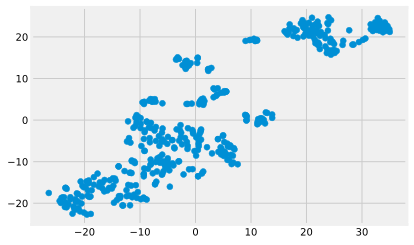

In [13]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


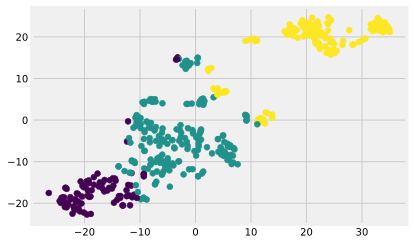

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, max_iter = 100) 
labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [15]:
a = y_train[labels_train == 0].mean()

In [16]:
b= y_train[labels_train == 1].mean()

In [17]:
c= y_train[labels_train == 2].mean()

In [18]:
x = a + b + c 
x

price    69.025009
dtype: float32

In [19]:
X_train.loc[labels_train == 0,'CRIM'].mean()

0.072118476

In [20]:
X_train.loc[labels_train == 1,'CRIM'].mean()

0.42098552

In [21]:
X_train.loc[labels_train == 2,'CRIM'].mean()

10.7152195

### * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [26]:
tsne = TSNE(n_components=2, learning_rate=150, random_state=100)

X_test_tsne = tsne.fit_transform(X_test_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))
print('До:\t{}'.format(X_test_scaled.shape))
print('После:\t{}'.format(X_test_tsne.shape))

До:	(404, 13)
После:	(404, 2)
До:	(102, 13)
После:	(102, 2)


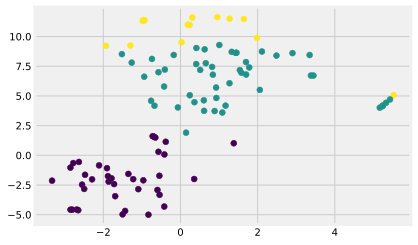

In [62]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, max_iter = 100) 
labels_train = kmeans.fit_predict(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_train)

plt.show()

In [64]:
a = y_test[labels_train == 0].mean()
a

price    16.710526
dtype: float32

In [65]:
b= y_test[labels_train == 1].mean()
b

price    21.652
dtype: float32

In [66]:
c= y_test[labels_train == 2].mean()
c

price    33.871426
dtype: float32

In [67]:
X_test.loc[labels_train == 0,'CRIM'].mean()

9.419182

In [68]:
X_test.loc[labels_train == 1,'CRIM'].mean()

0.22442122

In [69]:
X_test.loc[labels_train == 2,'CRIM'].mean()

0.08618571

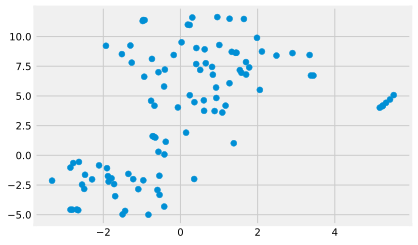

In [70]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1])

plt.show()

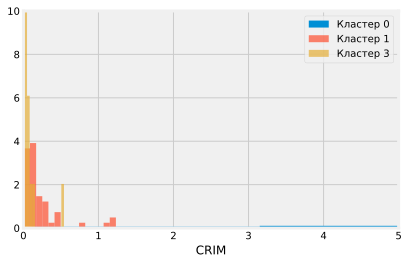

In [91]:
plt.hist(X_test.loc[labels_train == 0, 'CRIM'], bins=15, density=True, alpha=1)
plt.hist(X_test.loc[labels_train == 1, 'CRIM'], bins=15, density=True, alpha=0.7)
plt.hist(X_test.loc[labels_train == 2, 'CRIM'], bins=15, density=True, alpha=0.7)

plt.xlim(0, 5)
plt.ylim(0, 10)
plt.legend(['Кластер 0', 'Кластер 1','Кластер 3'])
plt.xlabel('CRIM')

plt.show()

In [75]:
# Количество комнат
print('Кластер 0: {}'.format(X_test.loc[labels_train == 0, 'RM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_train == 1, 'RM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_train == 2, 'RM'].mean()))

Кластер 0: 5.947421550750732
Кластер 1: 6.102100849151611
Кластер 2: 6.949856758117676


In [76]:
#криминальность района 
print('Кластер 0: {}'.format(X_test.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 9.419181823730469
Кластер 1: 0.22442121803760529
Кластер 2: 0.08618570864200592


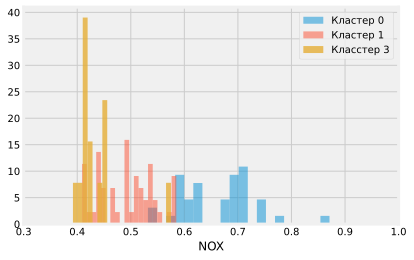

In [100]:
# Концентрация Газа
plt.hist(X_test.loc[labels_train == 0, 'NOX'], bins=20, density=True, alpha=0.5)
plt.hist(X_test.loc[labels_train == 1, 'NOX'], bins=20, density=True, alpha=0.5)
plt.hist(X_test.loc[labels_train == 2, 'NOX'], bins=20, density=True, alpha=0.8)

plt.xlim(0.3, 1)
plt.legend(['Кластер 0', 'Кластер 1','Класстер 3'])
plt.xlabel('NOX')

plt.show()